## Transaction is fraud or not?

In [7]:
# importing packages
import pandas as pd
import numpy as np

In [8]:
#dataset
df = pd.read_csv(r"C:\Users\Triloki-Gupta\Downloads\fraud-detection\PS_20174392719_1491204439457_log.csv")

### EDA

In [4]:
# Shape of dataset and top 5 rows
print(df.shape)
df.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
# Checking is there any null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

According to above info there is no such feature which have null value

In [44]:
# Statistics describtion of each features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


From above info we can get different type of stats discription corresponding each features

0    6354407
1       8213
Name: isFraud, dtype: int64


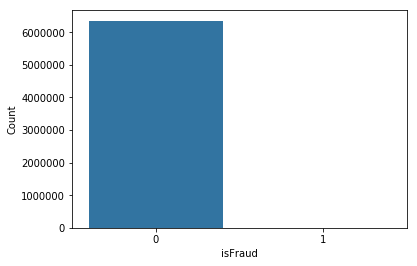

In [17]:
# count number of fraud and not fraud data
print(df.isFraud.value_counts())
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()

Total number of data point is 6362620 in which 8213 is fraud and 6354407 is not fraud data point.

Which means this is imbalanced datatset.

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


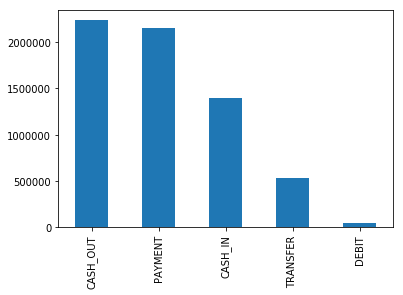

In [41]:
# Count number of data point in each type of transaction
print(df.type.value_counts())
df.type.value_counts().plot(kind='bar')
plt.show()

In [48]:
# Investigate variable "isFlaggedFraud"
pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [14]:
#Groupby type
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


1. Fraud occurs only in 2 type of transactions: 
  - TRANSFER and 
  - CASH_OUT


2. The number of fraudulent TRANSFERs = 4097

3. The number of fraudulent CASH_OUTs = 4116

4. The type of transactions in which isFlaggedFraud is set : TRANSFER

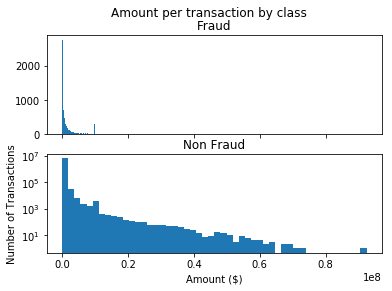

In [46]:
# Amount Vs number of transaction
fraud = df[df['isFraud']==1]
normal = df[df['isFraud']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
# bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Less number of transaction amount in fraud comapare to non fraud data

In [23]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [28]:
print('\n The types of fraudulent transactions are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print ('\n The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


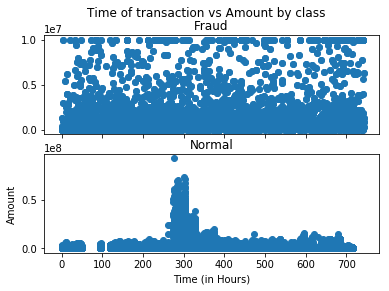

In [34]:
fraud = df[df.isFraud == 1]
normal = df[df.isFraud == 0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.step, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(normal.step, normal.amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Hours)')
plt.ylabel('Amount')
plt.show()

### Feature Engineering and Preprocessing

In [9]:
#importing packages
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score, f1_score,confusion_matrix
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance, to_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
%%time
# Feature extraction

data = df.copy()

# Merchant flag for source and dist
data['OrigC']=data['nameOrig'].apply(lambda x: 1 if str(x).find('C')==0 else 0)
data['DestC']=data['nameDest'].apply(lambda x: 1 if str(x).find('C')==0 else 0)

# flag for transfer and cashout in type columns
data['TRANSFER']=data['type'].apply(lambda x: 1 if x=='TRANSFER' else 0)
data['CASH_OUT']=data['type'].apply(lambda x: 1 if x=='CASH_OUT' else 0)

Wall time: 19.8 s


In [11]:
# Calculating Amount error
data['OrigAmntErr']=(abs(data.oldbalanceOrg-data.newbalanceOrig)-data.amount)
# data['DestAmntErr']=(abs(data.oldbalanceDest-data.newbalanceDest)-data.amount)

In [12]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'OrigC', 'DestC', 'TRANSFER', 'CASH_OUT',
       'OrigAmntErr'],
      dtype='object')

In [13]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,OrigC,DestC,TRANSFER,CASH_OUT,OrigAmntErr
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,0,0,0,1.455192e-11
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,0,0,0,-1.136868e-12
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,1,1,0,0.000000e+00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1,0,1,0.000000e+00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,0,0,0,0.000000e+00


In [14]:
# drop list 
# droping those feature which are category and used as feature extraction
droplist=['isFlaggedFraud','type','nameDest','nameOrig']

In [15]:
#print result
def model_result(clf,x_test,y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1 - score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix : ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

In [16]:
MLData=data.drop(labels=droplist,axis=1)
X=MLData.drop('isFraud',axis=1)
Y=MLData.isFraud

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42, shuffle=False)

## ML Model

**Performance Metric selection:** 

- Since the data is highly skewed, I am using the area under the precision-recall curve (AUPRC) rather than the conventional area under the receiver operating characteristic (AUROC).[refer](http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf)
- F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.[wiki](https://en.wikipedia.org/wiki/F1_score)

**ML algorithm selection:** 

1. A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. 

2. A second approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library.

3. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, XGBoost and random-forest algorithm used below slightly outperforms. Finally, XGBoost, RF, like several other ML algorithms, allows for weighting the positive class more compared to the negative class.

#### LOgistic Regression

In [18]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print ('Test')
model_result(lr,X_test,y_test)

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test


C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


AUPRC : 0.7158046412434134
F1 - score : 0.7536536887641764
Confusion_matrix : 
[[1903456     760]
 [   1347    3223]]
accuracy_score
0.9988961570338425
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904216
           1       0.81      0.71      0.75      4570

   micro avg       1.00      1.00      1.00   1908786
   macro avg       0.90      0.85      0.88   1908786
weighted avg       1.00      1.00      1.00   1908786



#### XGBoost

In [20]:
%%time
#Base metrics 
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier( scale_pos_weight = weights, n_jobs = 4, random_state=42)
clf.fit(X_train, y_train)
print ('Test')
model_result(clf,X_test,y_test)

[16:48:44] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test
AUPRC : 0.9997031966746327
F1 - score : 0.9962922573609597
Confusion_matrix : 
[[1904184      32]
 [      2    4568]]
accuracy_score
0.9999821876313008
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904216
           1       0.99      1.00      1.00      4570

   micro avg       1.00      1.00      1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 10min 57s


### Under sampling

In [21]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


The number of classes before fit Counter({0: 4450191, 1: 3643})
The number of classes after fit Counter({0: 4553, 1: 3643})


In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
print ('Test')
model_result(classifier,X_test,y_test)

Test
AUPRC : 0.008394897397900633
F1 - score : 0.007311327357883074
Confusion_matrix : 
[[ 663241 1240975]
 [      0    4570]]
accuracy_score
0.34986163980666246
classification_report
              precision    recall  f1-score   support

           0       1.00      0.35      0.52   1904216
           1       0.00      1.00      0.01      4570

   micro avg       0.35      0.35      0.35   1908786
   macro avg       0.50      0.67      0.26   1908786
weighted avg       1.00      0.35      0.52   1908786



### SMOTETomek

In [3]:
from imblearn.combine import SMOTETomek

In [ ]:
os=SMOTETomek(0.3)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

In [24]:
# modify step to hours in day. 
X['step24']=X.step%24

In [25]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, shuffle=False)

In [27]:
%%time
# metrics step in hour(s)
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier( scale_pos_weight = weights, n_jobs = 4, random_state=42)
clf.fit(X_train, y_train)
print ('Test')
model_result(clf,X_test,y_test)

[17:48:30] WARNING: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Test
AUPRC : 0.9997031966746327
F1 - score : 0.9962922573609597
Confusion_matrix : 
[[1904184      32]
 [      2    4568]]
accuracy_score
0.9999821876313008
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904216
           1       0.99      1.00      1.00      4570

   micro avg       1.00      1.00      1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 11min 48s


#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
print ('Test')
model_result(classifier,X_test,y_test)

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test
AUPRC : 0.9999998085682993
F1 - score : 0.9997811337272926
Confusion_matrix : 
[[1904216       0]
 [      2    4568]]
accuracy_score
0.9999989522136059
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904216
           1       1.00      1.00      1.00      4570

   micro avg       1.00      1.00      1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



#### LightGBM

In [35]:
%%time
#LGBMClassifier
# scaler = StandardScaler()
# scaler.fit(trainX)
# metrics for 0.3 test size
clf = lgb.LGBMClassifier(n_estimators=100,max_depth=3, n_jobs = 4, random_state=42)
clf.fit(X_train, y_train)
print ('Test')
model_result(clf,X_test,y_test)

Test
AUPRC : 0.0034493995595001005
F1 - score : 0.02929341702881056
Confusion_matrix : 
[[1902664    1552]
 [   4479      91]]
accuracy_score
0.9968404001286681
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904216
           1       0.06      0.02      0.03      4570

   micro avg       1.00      1.00      1.00   1908786
   macro avg       0.53      0.51      0.51   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 1min 15s
